In [ ]:
# I need to check if input theta, poses that is in the range of 0 to 2*pi and the distribution is -pi to pi,
# the computed weight mean works ?

In [1]:
from src.distributions.SE2.se2_distribution import SE2, SE2Gaussian
from src.distributions.SE2.SE2_torch import SE2_FFT
from src.utils.sampler import se2_grid_samples_torch
from src.utils.metrics import compute_weighted_mean
import torch
import numpy as np
import math

/home/mila/r/ria.arora/.conda/envs/diff-hef/lib/python3.10/site-packages/interpol/autograd.py:128: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/home/mila/r/ria.arora/.conda/envs/diff-hef/lib/python3.10/site-packages/interpol/autograd.py:147: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad):
/home/mila/r/ria.arora/.conda/envs/diff-hef/lib/python3.10/site-packages/interpol/autograd.py:158: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.float32)
/home/mila/r/ria.arora/.conda/envs/diff-hef/lib/python3.10/site-packages/interpol/autograd.py:177: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use 

In [2]:
grid_size = [50, 50, 32]
# def test_weighted_mean():
    # Create a SE2Gaussian distribution
mu = torch.tensor([-0.1, 0.2, 3*math.pi/2]).unsqueeze(0).to(torch.float64)
cov = torch.diag(torch.tensor([0.1, 0.1, 0.1])).to(torch.float64)
inv_cov = torch.inverse(cov)
fft = SE2_FFT(
spatial_grid_size=grid_size,
interpolation_method="spline",
spline_order=2,
oversampling_factor=3,
device = "cpu"
)

# Create a set of poses
poses, X, Y, T = se2_grid_samples_torch(1, grid_size)

se2_dist = SE2Gaussian(mu, cov, inv_cov, samples=poses, fft=fft)
se2_dist.normalize()



# Compute the weighted mean
mean_pose = compute_weighted_mean(se2_dist.prob, poses, X, Y, T)

# Check if the mean is close to the expected value
expected_mean = mu
# assert torch.allclose(mean_pose, expected_mean, atol=1e-1), f"Expected {expected_mean}, but got {mean_pose}"

KeyboardInterrupt: 

In [12]:
mu

tensor([[0.0000, 0.0000, 4.7124]], dtype=torch.float64)

In [11]:
mean_pose

tensor([[-0.0047, -0.0047,  4.6220]], dtype=torch.float64)

In [6]:
true_prob = torch.exp(se2_dist.compute_energy(poses))

/tmp/ipykernel_2229161/2125887713.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  f_marginalized = np.trapz(true_prob.real[0], x=T, axis=2)


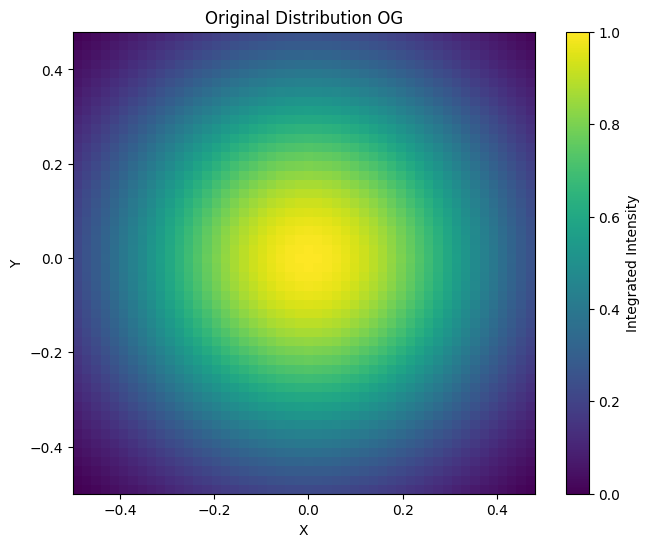

In [7]:
import matplotlib.pyplot as plt
f_marginalized = np.trapz(true_prob.real[0], x=T, axis=2)
f_marginalized_normalized = (f_marginalized - f_marginalized.min()) / (f_marginalized.max() - f_marginalized.min())

X_ = X[:,:,0]
Y_ = Y[:,:,0]
plt.figure(figsize=(8, 6))
plt.imshow(f_marginalized_normalized, extent=[X_.min(), X_.max(), Y_.min(), Y_.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Integrated Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Distribution OG')
plt.show()

/tmp/ipykernel_2229161/3852841279.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  f_marginalized = np.trapz(se2_dist.prob.real[0], x=T, axis=2)


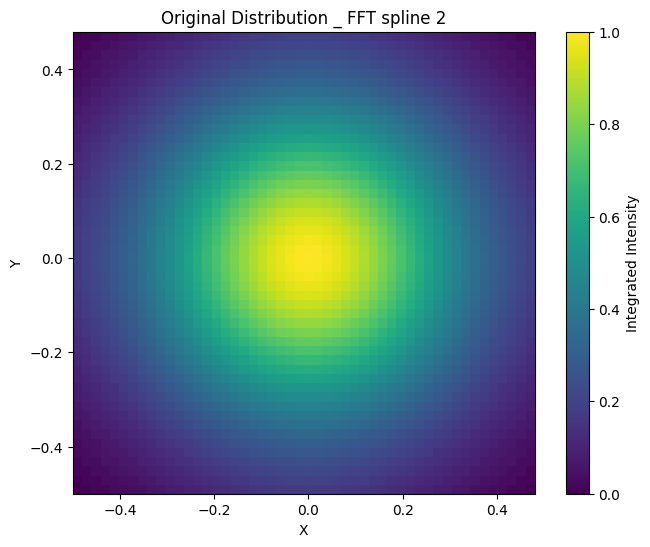

In [13]:
import matplotlib.pyplot as plt
f_marginalized = np.trapz(se2_dist.prob.real[0], x=T, axis=2)
f_marginalized_normalized = (f_marginalized - f_marginalized.min()) / (f_marginalized.max() - f_marginalized.min())

X_ = X[:,:,0]
Y_ = Y[:,:,0]
plt.figure(figsize=(8, 6))
plt.imshow(f_marginalized_normalized, extent=[X_.min(), X_.max(), Y_.min(), Y_.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Integrated Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Distribution _ FFT spline 2')
plt.show()

In [16]:
se2_dist.prob.shape

torch.Size([1, 50, 50, 32])

In [ ]:
_, _, _, _, _, f_hat = fft.analyze(se2_dist.prob)
f_reconstructed, _, _, _, _, _ = fft.synthesize(f_hat)

/tmp/ipykernel_2229161/1641278967.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  f_marginalized = np.trapz(f_reconstructed.real[0], x=T, axis=2)


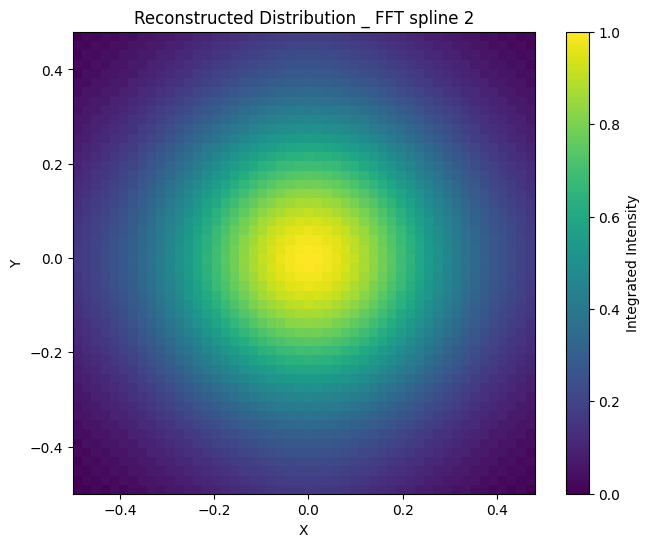

In [ ]:
import matplotlib.pyplot as plt
f_marginalized = np.trapz(f_reconstructed.real[0], x=T, axis=2)
f_marginalized_normalized = (f_marginalized - f_marginalized.min()) / (f_marginalized.max() - f_marginalized.min())

X_ = X[:,:,0]
Y_ = Y[:,:,0]
plt.figure(figsize=(8, 6))
plt.imshow(f_marginalized_normalized, extent=[X_.min(), X_.max(), Y_.min(), Y_.max()], origin='lower', cmap='viridis')
plt.colorbar(label='Integrated Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reconstructed Distribution _ FFT spline 2')
plt.show()

In [2]:
grid_size = [50, 50, 32]
mu = torch.tensor([0.0, 0.0, math.pi/2]).unsqueeze(0).to(torch.float64)
true_value = torch.tensor([0.1, 0.0, 4*math.pi/3]).unsqueeze(0).to(torch.float64)
cov = torch.diag(torch.tensor([0.1, 0.1, 0.1])).to(torch.float64)
inv_cov = torch.inverse(cov)
fft = SE2_FFT(
spatial_grid_size=grid_size,
interpolation_method="spline",
spline_order=1,
oversampling_factor=1,
device = "cpu"
)

# Create a set of poses
poses, X, Y, T = se2_grid_samples_torch(1, grid_size)
se2_dist = SE2Gaussian(mu, cov, inv_cov, samples=poses, fft=fft)
se2_dist.normalize()

# Compute the negative log-likelihood
nll_estimated = fft.neg_log_likelihood(se2_dist.energy, true_value)

In [4]:
k = true_value.shape[1] # 3
diff = true_value - mu # [1, 3]
diff[:,  2] = (diff[:,  2] + torch.pi) % (2 * torch.pi) - torch.pi
log_det = torch.logdet(cov) # [1]
diff_expanded = diff.unsqueeze(-1) # Shape: [1, 3, 1]
mahalanobis_dist = torch.matmul(torch.matmul(diff_expanded.transpose(-1, -2), inv_cov), diff_expanded).squeeze(-1)
# mahalanobis_dist = torch.sum(diff @ precision_matrix @ diff, dim=1).unsqueeze(-1)

log_constant = k * torch.log(torch.tensor(2 * torch.pi)) + log_det 
log_constant_ = torch.tile(log_constant.unsqueeze(0), [true_value.shape[0], 1]) # [1, 1]
log_likelihood = 0.5 * (log_constant_ + mahalanobis_dist)


In [3]:
nll_estimated

tensor([-20.2303], dtype=torch.float64)

In [5]:
log_likelihood

tensor([[33.6224]], dtype=torch.float64)